Library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor   
from sklearn.metrics import mean_squared_error, accuracy_score

Dataset

In [49]:
X_train = pd.read_csv("X_train_all.csv")
Y_train = pd.read_csv("Y_train_all.csv")
X_pred = pd.read_csv("X_pred.csv")

# X_test = pd.read_csv("X_test.csv")
# Y_test = pd.read_csv("Y_test.csv")

In [50]:
X_train.info(), Y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      15000 non-null  int64  
 1   carat   15000 non-null  float64
 2   depth   15000 non-null  float64
 3   table   15000 non-null  float64
 4   x       15000 non-null  float64
 5   y       15000 non-null  float64
 6   z       15000 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 820.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   No      15000 non-null  int64
 1   price   15000 non-null  int64
dtypes: int64(2)
memory usage: 234.5 KB


(None, None)

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [52]:
X_train = X_train.drop(columns=['No'])
Y_train = Y_train.drop(columns=['No'])
X_test = X_test.drop(columns=['No'])
Y_test = Y_test.drop(columns=['No'])
X_pred = X_pred.drop(columns=['No'])

In [53]:
X_train.head()

,carat,depth,table,x,y,z
9839,1.10,60.5,61.0,6.61,6.67,4.02
9680,1.00,62.0,56.0,6.38,6.43,3.97
7093,1.01,61.6,59.0,6.39,6.44,3.95
11293,1.00,60.7,60.0,6.55,6.49,3.96
820,0.81,60.3,57.0,6.07,6.04,3.65


In [54]:
X_test.head()

,carat,depth,table,x,y,z
11499,1.02,61.9,58.0,6.43,6.49,4.00
6475,0.90,62.1,59.0,6.02,6.16,3.78
13167,1.00,60.7,59.0,6.38,6.41,3.88
862,0.79,62.6,55.0,5.91,5.95,3.71
5970,0.90,63.4,58.0,6.09,6.12,3.87


In [55]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values
X_pred = X_pred.values

In [56]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, X_pred.shape

((12000, 6), (12000, 1), (3000, 6), (3000, 1), (10, 6))

Normalize

In [57]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

X_train = normalize(X_train)
X_test = normalize(X_test)

In [58]:
X_train = np.vstack((np.ones((X_train.shape[0], )), X_train.T)).T
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T
X_pred = np.vstack((np.ones((X_pred.shape[0], )), X_pred.T)).T

In [59]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, X_pred.shape

((12000, 7), (12000, 1), (3000, 7), (3000, 1), (10, 7))

Model

In [ ]:
def model_custom(X_train, Y_train, X_test, Y_test, learning_rate, iteration):
    m = Y_train.size
    
    theta = np.zeros((X_train.shape[1], 1))
    
    cost_list_train = []
    cost_list_test = []
    custom_runtime = []
    
    for i in range(iteration):
        start_time = time.time()    
        y_pred_train = np.dot(X_train, theta)
        y_prep_test = np.dot(X_test, theta)
        
        cost_train = (1/(2*m))*np.sum(np.square(y_pred_train - Y_train))
        cost_test = (1/(2*m))*np.sum(np.square(y_prep_test - Y_test))
        
        d_theta = (1/m)*np.dot(X_train.T, y_pred_train - Y_train)
        
        theta = theta - learning_rate*d_theta
        
        cost_list_train.append(cost_train)
        cost_list_test.append(cost_test)

        # to print the cost for 10 times
        if(i%(iteration//10) == 0):
            print(f"Cost at iteration {i}; Train: {cost_train:.6f} | Test: {cost_test:.6f}")
        end_time = time.time()
        custom_runtime.append(end_time - start_time)
    
    return theta, cost_list_train, cost_list_test, custom_runtime

In [61]:
iteration = 5000
learning_rate = 0.01

theta, custom_cost_list_train, custom_cost_list_test, custom_time = model_custom(
    X_train, 
    Y_train, 
    X_test,
    Y_test,
    learning_rate = learning_rate, 
    iteration = iteration
)
print(f"Tổng thời gian chạy của Custom Model: {sum(custom_time):.2f}s")

Cost at iteration 0; Train: 8526805.261833 | Test: 2118393.399958
Cost at iteration 500; Train: 207749.847901 | Test: 52260.575405
Cost at iteration 1000; Train: 206687.985203 | Test: 52085.907534
Cost at iteration 1500; Train: 206062.275411 | Test: 51944.294204
Cost at iteration 2000; Train: 205524.953458 | Test: 51817.385078
Cost at iteration 2500; Train: 205060.564230 | Test: 51703.312212
Cost at iteration 3000; Train: 204656.832669 | Test: 51600.459330
Cost at iteration 3500; Train: 204303.908201 | Test: 51507.478830
Cost at iteration 4000; Train: 203993.819116 | Test: 51423.227644
Cost at iteration 4500; Train: 203720.064962 | Test: 51346.726291
Tổng thời gian chạy của Custom Model: 0.63s


In [62]:
print(f"Theta: {theta}")

Theta: [[3880.858     ]
 [ 185.46766794]
 [  22.55533654]
 [ -41.88620377]
 [ 231.50475047]
 [ 731.35957425]
 [ 124.83252534]]


In [63]:
X_test[:5]

array([[ 1.        ,  0.44507907,  0.03611802,  0.09056847,  0.44603702,
         0.5409234 ,  0.49399634],
       [ 1.        , -0.01476614,  0.1686612 ,  0.53606019, -0.13599728,
         0.06465256, -0.00164463],
       [ 1.        ,  0.3684382 , -0.7591411 ,  0.53606019,  0.37505723,
         0.4254638 ,  0.22364672],
       [ 1.        , -0.43629092,  0.50001917, -1.2459067 , -0.29215283,
        -0.23842888, -0.15934857],
       [ 1.        , -0.01476614,  1.03019191,  0.09056847, -0.03662557,
         0.00692276,  0.20111759]])

In [64]:
y_pred_test = np.dot(X_test, theta)
print("Dự đoán của mô hình tự cài đặt:\n", y_pred_test.ravel())

Dự đoán của mô hình tự cài đặt:
 [4520.96286533 3875.06499302 4335.52810273 ...   30.8171425  1502.11037083
 5260.76399419]


Sklearn

In [65]:
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

In [66]:
model_sklearn = SGDRegressor(
    max_iter=1, tol=None, 
    learning_rate='constant', 
    eta0=learning_rate, 
    random_state=42, 
    warm_start=True)

# Các biến lưu trữ lỗi
sklearn_train_errors = []
sklearn_test_errors = []
sklearn_time = []

# Vòng lặp huấn luyện theo từng epoch
epochs = iteration
for epoch in range(epochs):
    start_time = time.time()
    
    # Huấn luyện model trên tập train
    model_sklearn.fit(X_train, Y_train)
    
    # Dự đoán và tính lỗi cho tập train và test
    y_train_pred = model_sklearn.predict(X_train)
    y_test_pred = model_sklearn.predict(X_test)
    
    train_mse = mean_squared_error(Y_train, y_train_pred)
    test_mse = mean_squared_error(Y_test, y_test_pred)
    
    # Lưu lại lỗi
    sklearn_train_errors.append(train_mse)
    sklearn_test_errors.append(test_mse)
    
    # In lỗi sau mỗi 10% epochs
    if(epoch % (epochs // 10) == 0):
        print(f"Epoch {epoch}, Train MSE: {train_mse}, Test MSE: {test_mse}")
        
    end_time = time.time()
    sklearn_time.append(end_time - start_time)
print(f"Tổng thời gian chạy của Sklearn Model: {sum(sklearn_time):.2f}s")

Epoch 0, Train MSE: 421699.1355307838, Test MSE: 425615.3786672543
Epoch 500, Train MSE: 419654.85439903155, Test MSE: 420099.85571329226
Epoch 1000, Train MSE: 419655.59212473646, Test MSE: 420100.7261599389
Epoch 1500, Train MSE: 419655.6288577342, Test MSE: 420100.76950121537
Epoch 2000, Train MSE: 419655.63068670116, Test MSE: 420100.77165921347
Epoch 2500, Train MSE: 419655.6307777665, Test MSE: 420100.77176666155
Epoch 3000, Train MSE: 419655.6307823009, Test MSE: 420100.77177201165
Epoch 3500, Train MSE: 419655.6307825266, Test MSE: 420100.7717722781
Epoch 4000, Train MSE: 419655.63078253804, Test MSE: 420100.77177229157
Epoch 4500, Train MSE: 419655.63078253856, Test MSE: 420100.77177229215
Tổng thời gian chạy của Sklearn Model: 13.59s


Chart

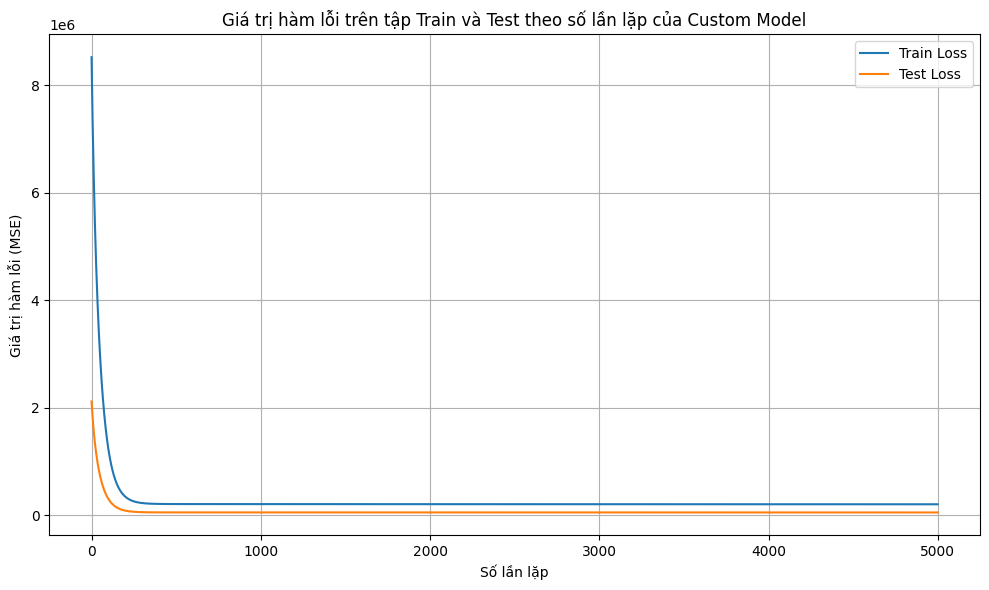

In [67]:
# Vẽ biểu đồ 
plt.figure(figsize=(10, 6))
plt.plot(range(iteration), custom_cost_list_train, label="Train Loss")
plt.plot(range(iteration), custom_cost_list_test, label="Test Loss")
plt.xlabel("Số lần lặp")
plt.ylabel("Giá trị hàm lỗi (MSE)")
plt.legend()
plt.title("Giá trị hàm lỗi trên tập Train và Test theo số lần lặp của Custom Model")
plt.grid()
plt.tight_layout() 
plt.show()

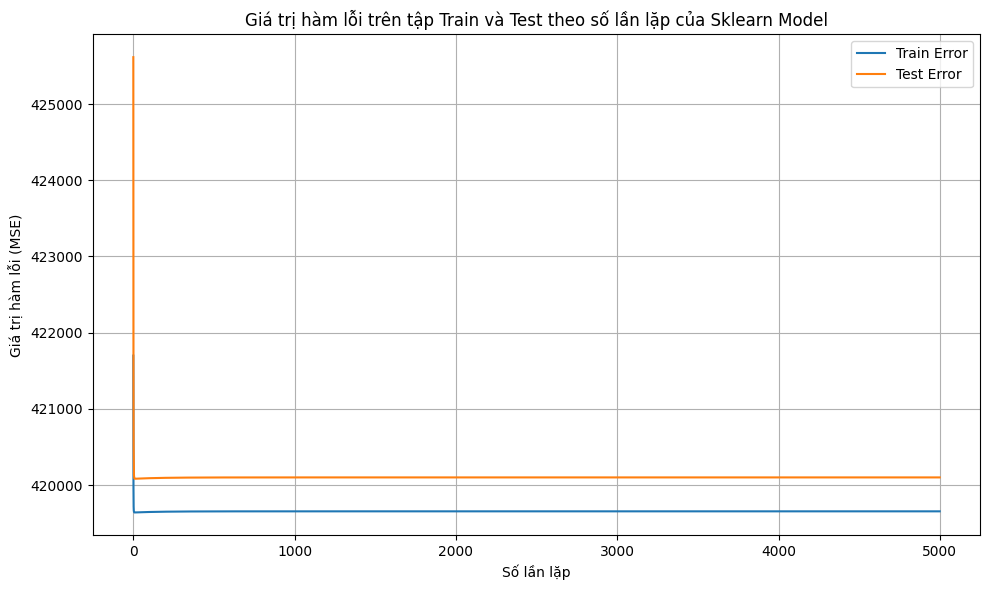

In [68]:
# Vẽ đồ thị lỗi
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), sklearn_train_errors, label='Train Error')
plt.plot(range(epochs), sklearn_test_errors, label='Test Error')
plt.xlabel("Số lần lặp")
plt.ylabel("Giá trị hàm lỗi (MSE)")
plt.legend()
plt.title("Giá trị hàm lỗi trên tập Train và Test theo số lần lặp của Sklearn Model")
plt.grid()
plt.tight_layout() 
plt.show()

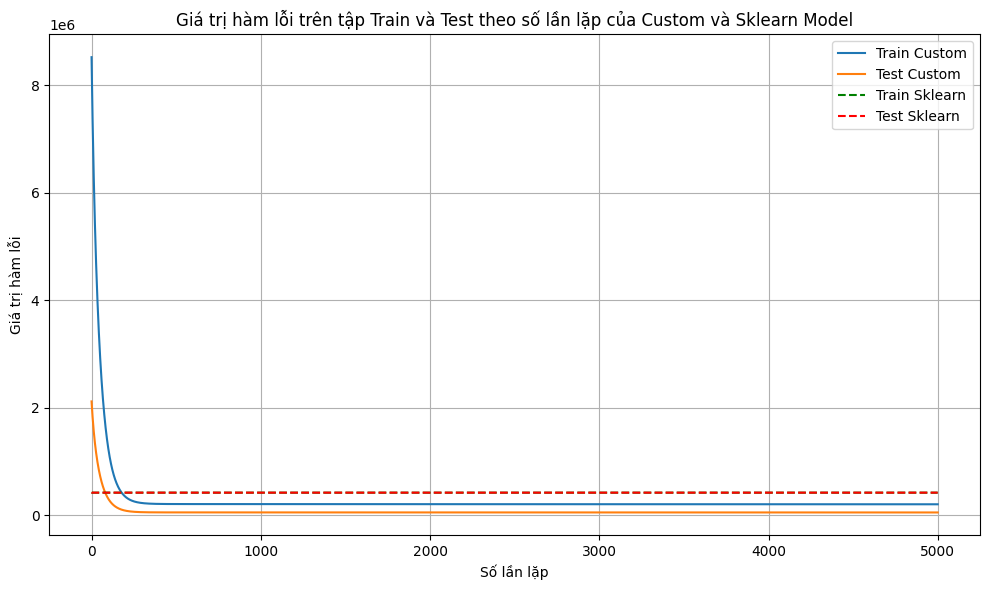

In [69]:
# Vẽ đồ thị lỗi
plt.figure(figsize=(10, 6))
plt.plot(range(iteration), custom_cost_list_train, label='Train Custom')
plt.plot(range(iteration), custom_cost_list_test, label='Test Custom')
plt.plot(range(iteration), sklearn_train_errors, label='Train Sklearn', linestyle='--', color='green')
plt.plot(range(iteration), sklearn_test_errors, label='Test Sklearn', linestyle='--', color='red')
plt.xlabel("Số lần lặp")
plt.ylabel("Giá trị hàm lỗi")
plt.legend()
plt.title("Giá trị hàm lỗi trên tập Train và Test theo số lần lặp của Custom và Sklearn Model")
plt.grid()
plt.tight_layout() 
plt.show()

Accuracy

In [70]:
# Dự đoán với mô hình tự cài đặt
y_val_pred_custom = np.dot(X_test, theta)
mse_custom = mean_squared_error(Y_test, y_val_pred_custom)

# Dự đoán với mô hình của sklearn
y_val_pred_sklearn = model_sklearn.predict(X_test)
mse_sklearn = mean_squared_error(Y_test, y_val_pred_sklearn)

print("Custom Model - MSE:", mse_custom)
print("Sklearn Model - MSE:", mse_sklearn)

Custom Model - MSE: 410217.02901880397
Sklearn Model - MSE: 420100.7717722922


Time

In [71]:
print("Custom Model - Time:", sum(custom_time))
print("Sklearn Model - Time:", sum(sklearn_time))

Custom Model - Time: 0.6328799724578857
Sklearn Model - Time: 13.592546463012695


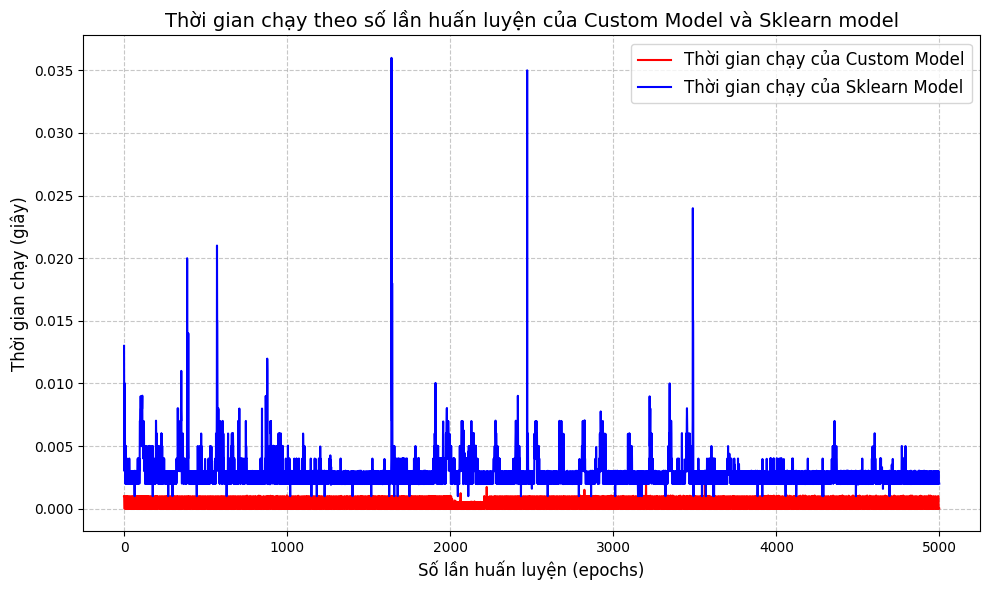

In [72]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(range(iteration), custom_time, color='red', label='Thời gian chạy của Custom Model')
plt.plot(range(iteration), sklearn_time, color='blue', label='Thời gian chạy của Sklearn Model')
plt.xlabel("Số lần huấn luyện (epochs)", fontsize=12)
plt.ylabel("Thời gian chạy (giây)", fontsize=12)
plt.title("Thời gian chạy theo số lần huấn luyện của Custom Model và Sklearn model", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

Prediction

In [73]:
y_pred_custom = np.dot(X_pred, theta)
print("Dự đoán của mô hình tự cài đặt:\n", y_pred_custom.ravel())

# Dự đoán kết quả trên tập dữ liệu mới
y_pred_sklearn = model_sklearn.predict(X_pred)
print("Dự đoán của mô hình sklearn:\n", y_pred_sklearn)

Dự đoán của mô hình tự cài đặt:
 [10351.57364568  9817.05284525  9808.9350332  10088.66090914
  9837.46541903 10228.28432274 10038.7056719  10379.82077167
 10470.33476836 10020.27963402]
Dự đoán của mô hình sklearn:
 [16618.19334877 15974.77105672 15874.00610933 16184.69857727
 15975.07581547 16400.65866583 16255.02603841 16579.73211604
 16631.46825314 16203.15738343]


In [75]:
mse_pred = mean_squared_error(y_pred_custom, y_pred_sklearn)
print("Prediction - MSE:", mse_pred)

Prediction - MSE: 38017232.755326316
